# CNN Tutorial for Image Classification

This notebook demonstrates how to implement Convolutional Neural Networks (CNNs) for image classification using TensorFlow/Keras. We use a unique Butterfly Species Classification dataset. The notebook covers data preparation, building a CNN from scratch, and leveraging a pre-trained model (VGG16) for transfer learning.

Github Link : [https://github.com/jahanzaib3611/CNNs-for-Image-Classification-Tutorial.git](https://github.com/jahanzaib3611/CNNs-for-Image-Classification-Tutorial.git)

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16

import matplotlib.pyplot as plt
%matplotlib inline

print('TensorFlow version:', tf.__version__)

2025-03-26 05:02:12.137353: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-26 05:02:12.373770: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-26 05:02:12.480598: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742965332.699837   21238 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742965332.763397   21238 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742965333.386121   21238 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

TensorFlow version: 2.19.0


## Data Preparation and Exploration

We assume the dataset is organized into `train` and `validation` directories under `data/butterflies/` with subfolders for each class.

Found 1049 images belonging to 8 classes.
Found 40 images belonging to 8 classes.


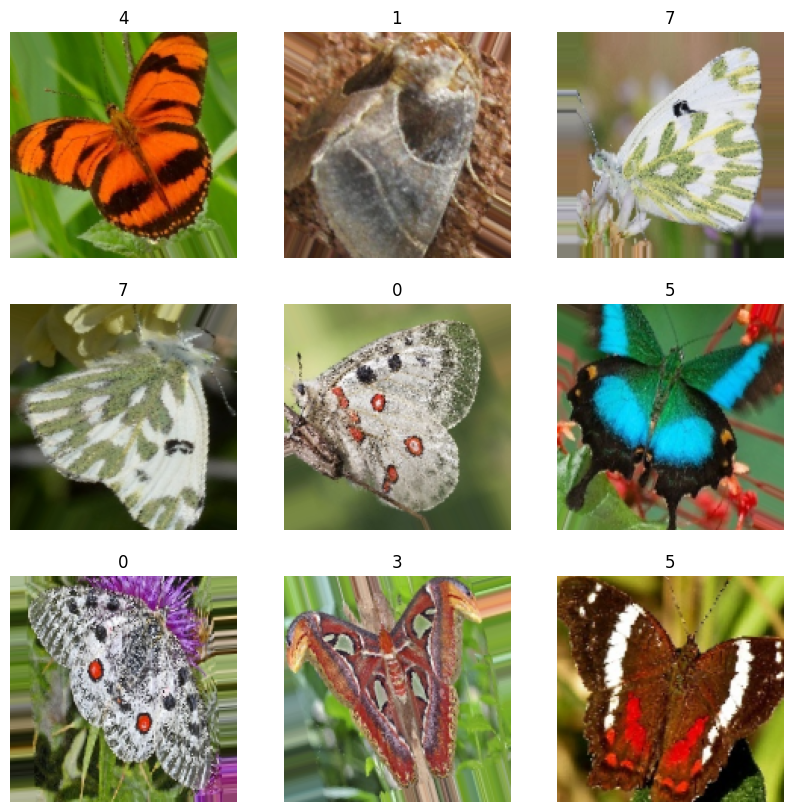

In [3]:
# Define dataset paths
train_dir = 'data/butterflies/train'
val_dir = 'data/butterflies/validation'

# Create ImageDataGenerators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of image data and labels
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Display a batch of images
import numpy as np
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(np.argmax(y_batch[i]))
    plt.axis('off')
plt.show()

## Building a CNN from Scratch

The following model consists of three convolutional blocks and fully connected layers to classify the butterfly images.

In [4]:
# Build a CNN from scratch
cnn_model = Sequential([
    # Convolutional Block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Convolutional Block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Convolutional Block 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-26 05:02:19.837140: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-03-26 05:02:19.890473: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.
2025-03-26 05:02:19.998542: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.
2025-03-26 05:02:20.028616: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,037,768 (72.62 MB)

 Trainable params: 19,037,768 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

## Using a Pre-Trained Model (VGG16) and Fine-Tuning

Next, we load the VGG16 model (excluding the top layers), freeze its convolutional base, and add custom dense layers for our classification task.

In [5]:
# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze the convolutional base

# Build the transfer learning model
tl_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Reduce each feature map to a single value
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

tl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
tl_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,072 (56.64 MB)

 Trainable params: 133,384 (521.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Comparison: Fully Connected Model vs. CNN

For comparison, here is a simple fully connected model that flattens the image input. Notice that this model loses spatial information.

In [6]:
# Fully Connected Model (for comparison)
fc_model = Sequential([
    Flatten(input_shape=(150, 150, 3)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

fc_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fc_model.summary()

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-03-26 05:02:20.813062: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138240000 exceeds 10% of free system memory.
2025-03-26 05:02:21.015453: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138240000 exceeds 10% of free system memory.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    34,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,693,896 (132.35 MB)

 Trainable params: 34,693,896 (132.35 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Models

Below is an example of how you can train the CNN model. You can similarly train the transfer learning and fully connected models.

*Note: Adjust the number of epochs and steps per epoch as needed for your dataset size.*

In [ ]:
# Train the CNN from scratch model
history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10
)

# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1:31 3s/step - accuracy: 0.1250 - loss: 2.0874

32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2968 - loss: 1.9749 - val_accuracy: 0.6562 - val_loss: 0.8061
Epoch 2/10
 1/32 ━━━━━━━━━━━━━━━━━━━━ 30s 969ms/step - accuracy: 0.4688 - loss: 1.1453

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 1.1453 - val_accuracy: 0.7500 - val_loss: 0.5950
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6190 - loss: 0.9948 - val_accuracy: 0.8125 - val_loss: 0.4445
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7188 - loss: 0.6186 - val_accuracy: 0.9062 - val_loss: 0.3847
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7377 - loss: 0.7195 - val_accuracy: 0.9375 - val_loss: 0.2537
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6875 - loss: 0.8273 - val_accuracy: 0.9688 - val_loss: 0.1463
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 950ms/step - accuracy: 0.7984 - loss: 0.5847 - val_accuracy: 0.9688 - val_loss: 0.1905
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7500 - loss: 0.7336 - val_accuracy: 0.9688 - val_loss: 0.1430
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 954ms/step - accuracy: 0.8502 - loss: 0.4463

## Conclusion

This notebook demonstrated two approaches for classifying butterfly species using CNNs. We explored building a CNN from scratch and applying transfer learning with a pre-trained VGG16 model. Comparing these with a fully connected model illustrates the benefits of convolutional layers in capturing spatial hierarchies in images.